# Overlay SSUSI or TIMED GUVI data on a map.

In [1]:
import os
import datetime
import matplotlib.pyplot as plt
from davitpy import utils
from imagers.ssusi import ssusi_utils
from imagers.timed import timed_utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


reading data from---> /tmp/ssusi/prcsd/F18/20161201.txt
reading data from---> /tmp/ssusi/prcsd/F17/20161201.txt


file not found--> /tmp/ssusi/prcsd/F16/20161201.txt


/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (htt

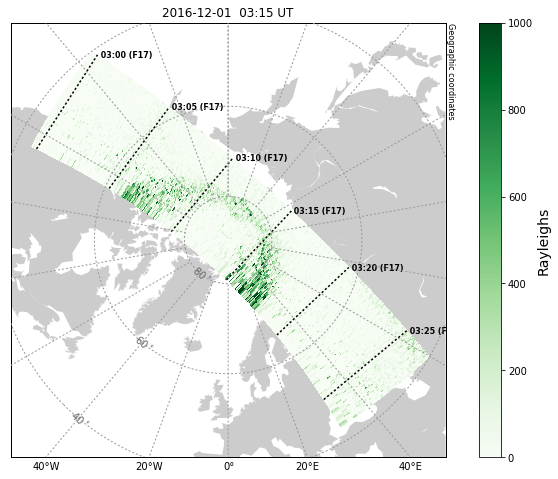

In [2]:
# An input dir where we can find ssusi processed files
# In case you don't have processed files(refer the 
# "process_data" notebook).
inpDir = "/tmp/ssusi/prcsd/" # Make sure you have this dir or create it
fileDate = datetime.datetime( 2016, 12, 1 )
inpTime = datetime.datetime( 2016, 12, 1, 3, 15 )
coords="mlt"
ssObj = ssusi_utils.UtilsSsusi( inpDir, fileDate )
# PLOT DATA
fDict = ssObj.filter_data_by_time(inpTime, timeDelta=40.)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
ssObj.overlay_sat_data( fDict, m, ax, satList=["F17"],\
         inpTime=inpTime, vmin=0., vmax=1000., autoScale=False, coords=coords,alpha=1. )
figName = "figs/ssusi-demo.pdf" 
fig.savefig(figName,bbox_inches='tight')

reading data from---> /tmp/timed/prcsd/20020318.txt
converting from geo to aacgm coordinates


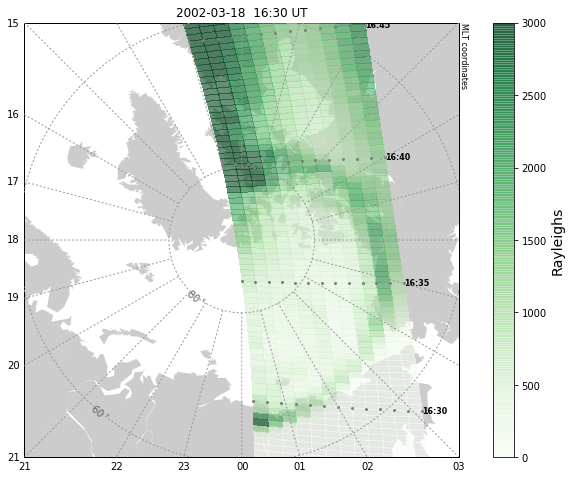

In [3]:
inpDir = "/tmp/timed/prcsd/"# Make sure you have this dir or create it
fileDate = datetime.datetime( 2002, 3, 18 )
inpTime = datetime.datetime( 2002, 3, 18, 16, 30 )
coords="mlt"
tgObj = timed_utils.UtilsTimedGuvi( inpDir, fileDate )
fDict = tgObj.filter_data_by_time(inpTime, timeDelta=40)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
mapHandle = utils.plotUtils.mapObj(boundinglat=60., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
tgObj.overlay_sat_data( fDict, mapHandle, ax,\
         inpTime=inpTime, vmin=0., vmax=3000., autoScale=False, coords=coords )
figName = "figs/timed-demo.pdf" 
fig.savefig(figName,bbox_inches='tight')